# **News Processing (radarjatim.id)**

***Read Data***

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projectPPW/tugas/radarjatim_fix.csv')
df

,Judul,Content,Category
0,"Elektabilitas Prabowo – Gibran Makin Kuat, Din...",SURABAYA (RadarJatim.id) Lembaga survei Populi...,Nasional
1,"Perbesar Kemenangan, Infrastruktur TKN Prabowo...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional
2,"Rekam Jejak Gemilang, Prabowo – Gibran Duet Pe...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional
3,Tanpa Basa-Basa Aksi Nyata Prabowo Terima Pulu...,SURABAYA (RadarJatim.id) Menteri Pertahanan (M...,Nasional
4,Dukungan Kuat Khofifah Buka Lebar Jalan Prabow...,SURABAYA (RadarJatim.id) Dukungan Gubernur Jaw...,Nasional
...,...,...,...
258,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal
259,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal
260,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal
261,Lapas Madiun Gagalkan Penyelundupan Narkoba,SURABAYA (RadarJatim.id) – Jajaran Kanwil Keme...,Hukum dan Kriminal


***Cek Jumlah Category***

In [ ]:
# Hitung jumlah kelas
kelas = df['Category'].value_counts()
kelas

Hukum dan Kriminal    98
Pendidikan            89
Nasional              76
Name: Category, dtype: int64

***Cek Missing Value***

In [ ]:
df.isnull().sum()

Judul       0
Content     0
Category    0
dtype: int64

***Cek Duplikasi Kalimat***

In [ ]:
df.duplicated().sum()

0

***Preprocessing***

***Cleansing Data***

In [ ]:
import re
df['Clean_Content'] = df['Content'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
df

,Judul,Content,Category,Clean_Content
0,"Elektabilitas Prabowo – Gibran Makin Kuat, Din...",SURABAYA (RadarJatim.id) Lembaga survei Populi...,Nasional,surabaya radarjatim.id lembaga survei populi c...
1,"Perbesar Kemenangan, Infrastruktur TKN Prabowo...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional,surabaya radarjatim.id calon presiden capres p...
2,"Rekam Jejak Gemilang, Prabowo – Gibran Duet Pe...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional,surabaya radarjatim.id calon presiden capres p...
3,Tanpa Basa-Basa Aksi Nyata Prabowo Terima Pulu...,SURABAYA (RadarJatim.id) Menteri Pertahanan (M...,Nasional,surabaya radarjatim.id menteri pertahanan menh...
4,Dukungan Kuat Khofifah Buka Lebar Jalan Prabow...,SURABAYA (RadarJatim.id) Dukungan Gubernur Jaw...,Nasional,surabaya radarjatim.id dukungan gubernur jawa ...
...,...,...,...,...
258,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal,surabaya radarjatim.id wakil wali kota surabay...
259,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal,sidoarjo radarjatim.id penataan ulang rutan i...
260,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal,surabaya radarjatim.id komisi pemberantasan ko...
261,Lapas Madiun Gagalkan Penyelundupan Narkoba,SURABAYA (RadarJatim.id) – Jajaran Kanwil Keme...,Hukum dan Kriminal,surabaya radarjatim.id jajaran kanwil kemenku...


***Tokenizing***

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df["Tokenizing"] = df['Clean_Content'].apply(sent_tokenize)
df

,Judul,Content,Category,Clean_Content,Tokenizing
0,"Elektabilitas Prabowo – Gibran Makin Kuat, Din...",SURABAYA (RadarJatim.id) Lembaga survei Populi...,Nasional,surabaya radarjatim.id lembaga survei populi c...,[surabaya radarjatim.id lembaga survei populi ...
1,"Perbesar Kemenangan, Infrastruktur TKN Prabowo...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional,surabaya radarjatim.id calon presiden capres p...,[surabaya radarjatim.id calon presiden capres ...
2,"Rekam Jejak Gemilang, Prabowo – Gibran Duet Pe...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional,surabaya radarjatim.id calon presiden capres p...,[surabaya radarjatim.id calon presiden capres ...
3,Tanpa Basa-Basa Aksi Nyata Prabowo Terima Pulu...,SURABAYA (RadarJatim.id) Menteri Pertahanan (M...,Nasional,surabaya radarjatim.id menteri pertahanan menh...,[surabaya radarjatim.id menteri pertahanan men...
4,Dukungan Kuat Khofifah Buka Lebar Jalan Prabow...,SURABAYA (RadarJatim.id) Dukungan Gubernur Jaw...,Nasional,surabaya radarjatim.id dukungan gubernur jawa ...,[surabaya radarjatim.id dukungan gubernur jawa...
...,...,...,...,...,...
258,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal,surabaya radarjatim.id wakil wali kota surabay...,[surabaya radarjatim.id wakil wali kota suraba...
259,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal,sidoarjo radarjatim.id penataan ulang rutan i...,[sidoarjo radarjatim.id penataan ulang rutan ...
260,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal,surabaya radarjatim.id komisi pemberantasan ko...,[surabaya radarjatim.id komisi pemberantasan k...
261,Lapas Madiun Gagalkan Penyelundupan Narkoba,SURABAYA (RadarJatim.id) – Jajaran Kanwil Keme...,Hukum dan Kriminal,surabaya radarjatim.id jajaran kanwil kemenku...,[surabaya radarjatim.id jajaran kanwil kemenk...


***TF-IDF***

In [ ]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_results = []
set_len_doc = df['Tokenizing'][:]
for i in range(len(set_len_doc)): #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tokenizing'][i]) #menjadikan tfidf setiap dokumen
  tfidf_results.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_results

In [ ]:
# Menampilkan data TFIDF
for idoc in range(len(tfidf_results)):
  print(f'========== Document ke-{idoc} ==========')

  arr_tfidf_results = tfidf_results[idoc].toarray() #menjadikan hasil tfidf yang format sparesematrix menjadi array

  index = 0
  for hasils in arr_tfidf_results:
    print(f'Hasil Tfidf Kalimat ke-{index+1} = {list(hasils)}')
    index+=1
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

***Cosine Similarity***

> Cosine similarity adalah sebuah metrik yang digunakan untuk mengukur sejauh mana kemiripan antara dua vektor non-nol dalam ruang berdimensi banyak.



In [ ]:
# Import Library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [ ]:
cos_sim_result = [] #untuk menyimpan hasil cosine sim akhir
graf_result = [] #untuk menyimpan hasil graf akhir
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):
  # print(f'========= Document ke-{i_doc} ==========')

  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc]) #menjadikan tfidf ke cosine

  for i_hasil in range(len(cos_sim)): #inisialisasi indeks awal perulangan dari setiap hasil cosine
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)): #inisialisasi indeks kedua perulangan dari setiap hasil cosine
      if cos_sim[i_hasil][j_hasil] > treshold: #cek apakah cosim dari kalimat 1 dan 2 lebih dari treshold?
        # print(f'Similairty kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]]) #menyimpan nilai indeks awal, indeks awal+1, hasil cosim
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil]) #menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
  # print('\n')

In [ ]:
# menampilkan hasil cosine simmilarity
for i in range(len(cos_sim_result)):
  print(f'============= Document ke - {i} ==============')
  for j in range(len(cos_sim_result[i])):
    for idx1,idx2,hasil in cos_sim_result[i][j]:
      print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')
  print('\n')

Streaming output truncated to the last 5000 lines.
Cosine Similarity Kalimat 13 : 23 = 0.16097787275472494
Cosine Similarity Kalimat 13 : 24 = 0.2621094920211361
Cosine Similarity Kalimat 13 : 25 = 0.1417905680282477
Cosine Similarity Kalimat 13 : 28 = 0.26655822417236563
Cosine Similarity Kalimat 14 : 15 = 0.3839756156183186
Cosine Similarity Kalimat 16 : 17 = 0.09706455793331435
Cosine Similarity Kalimat 16 : 23 = 0.4571402974576214
Cosine Similarity Kalimat 16 : 27 = 0.1521643726417715
Cosine Similarity Kalimat 17 : 25 = 0.12298343878444855
Cosine Similarity Kalimat 17 : 27 = 0.25258966491985524
Cosine Similarity Kalimat 17 : 28 = 0.14526208550609204
Cosine Similarity Kalimat 18 : 19 = 0.10818347888568039
Cosine Similarity Kalimat 19 : 21 = 0.08954761045633612
Cosine Similarity Kalimat 19 : 22 = 0.11129305160234094
Cosine Similarity Kalimat 19 : 24 = 0.12248593668936064
Cosine Similarity Kalimat 19 : 25 = 0.11011499497926866
Cosine Similarity Kalimat 19 : 27 = 0.0959892864438735
Cos

***Closenens Centrality***

> Merupakan salah satu ukuran centralitas dalam jaringan yang mengukur seberapa dekat suatu simpul (node) dalam jaringan terhadap simpul-simpul lainnya. Hal ini mengukur seberapa cepat atau seberapa mudah sebuah simpul dapat diakses oleh simpul lain dalam jaringan.



In [ ]:
# Cuma cek Hitung closeness centrality pada index 0
closeness_centrality = nx.closeness_centrality(graf_result[0])
closeness_centrality

{0: 0.0,
 2: 0.07692307692307693,
 5: 0.23076923076923078,
 6: 0.32051282051282054,
 1: 0.0,
 4: 0.07692307692307693,
 11: 0.5494505494505495,
 12: 0.3282051282051282,
 13: 0.2967032967032967,
 3: 0.0,
 7: 0.2517482517482517,
 8: 0.2517482517482517,
 10: 0.41538461538461535,
 9: 0.2094017094017094}

In [ ]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  # pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  # labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # # Menentukan ukuran canvas
  # plt.figure(figsize=(30, 20))

  # # Menggambar graf dengan ukuran canvas yang diperbesar
  # nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  # nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  # # plt.show()


  print('\n')

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 2 = 0.07692307692307693
Closenes Centrality Node 5 = 0.23076923076923078
Closenes Centrality Node 6 = 0.32051282051282054
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 4 = 0.07692307692307693
Closenes Centrality Node 11 = 0.5494505494505495
Closenes Centrality Node 12 = 0.3282051282051282
Closenes Centrality Node 13 = 0.2967032967032967
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 7 = 0.2517482517482517
Closenes Centrality Node 8 = 0.2517482517482517
Closenes Centrality Node 10 = 0.41538461538461535
Closenes Centrality Node 9 = 0.2094017094017094


========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.058823529411764705
Closenes Centrality Node 3 = 0.058823529411764705
Closenes Centrality Node 4 = 0.17647058823529413
Closenes Centrality Node 5 = 0.17647058823529413
Closenes Centrality Node 8 = 0.2450980392156863
Clo

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 2 = 0.07692307692307693
Closenes Centrality Node 5 = 0.23076923076923078
Closenes Centrality Node 6 = 0.32051282051282054
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 4 = 0.07692307692307693
Closenes Centrality Node 11 = 0.5494505494505495
Closenes Centrality Node 12 = 0.3282051282051282
Closenes Centrality Node 13 = 0.2967032967032967
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 7 = 0.2517482517482517
Closenes Centrality Node 8 = 0.2517482517482517
Closenes Centrality Node 10 = 0.41538461538461535
Closenes Centrality Node 9 = 0.2094017094017094


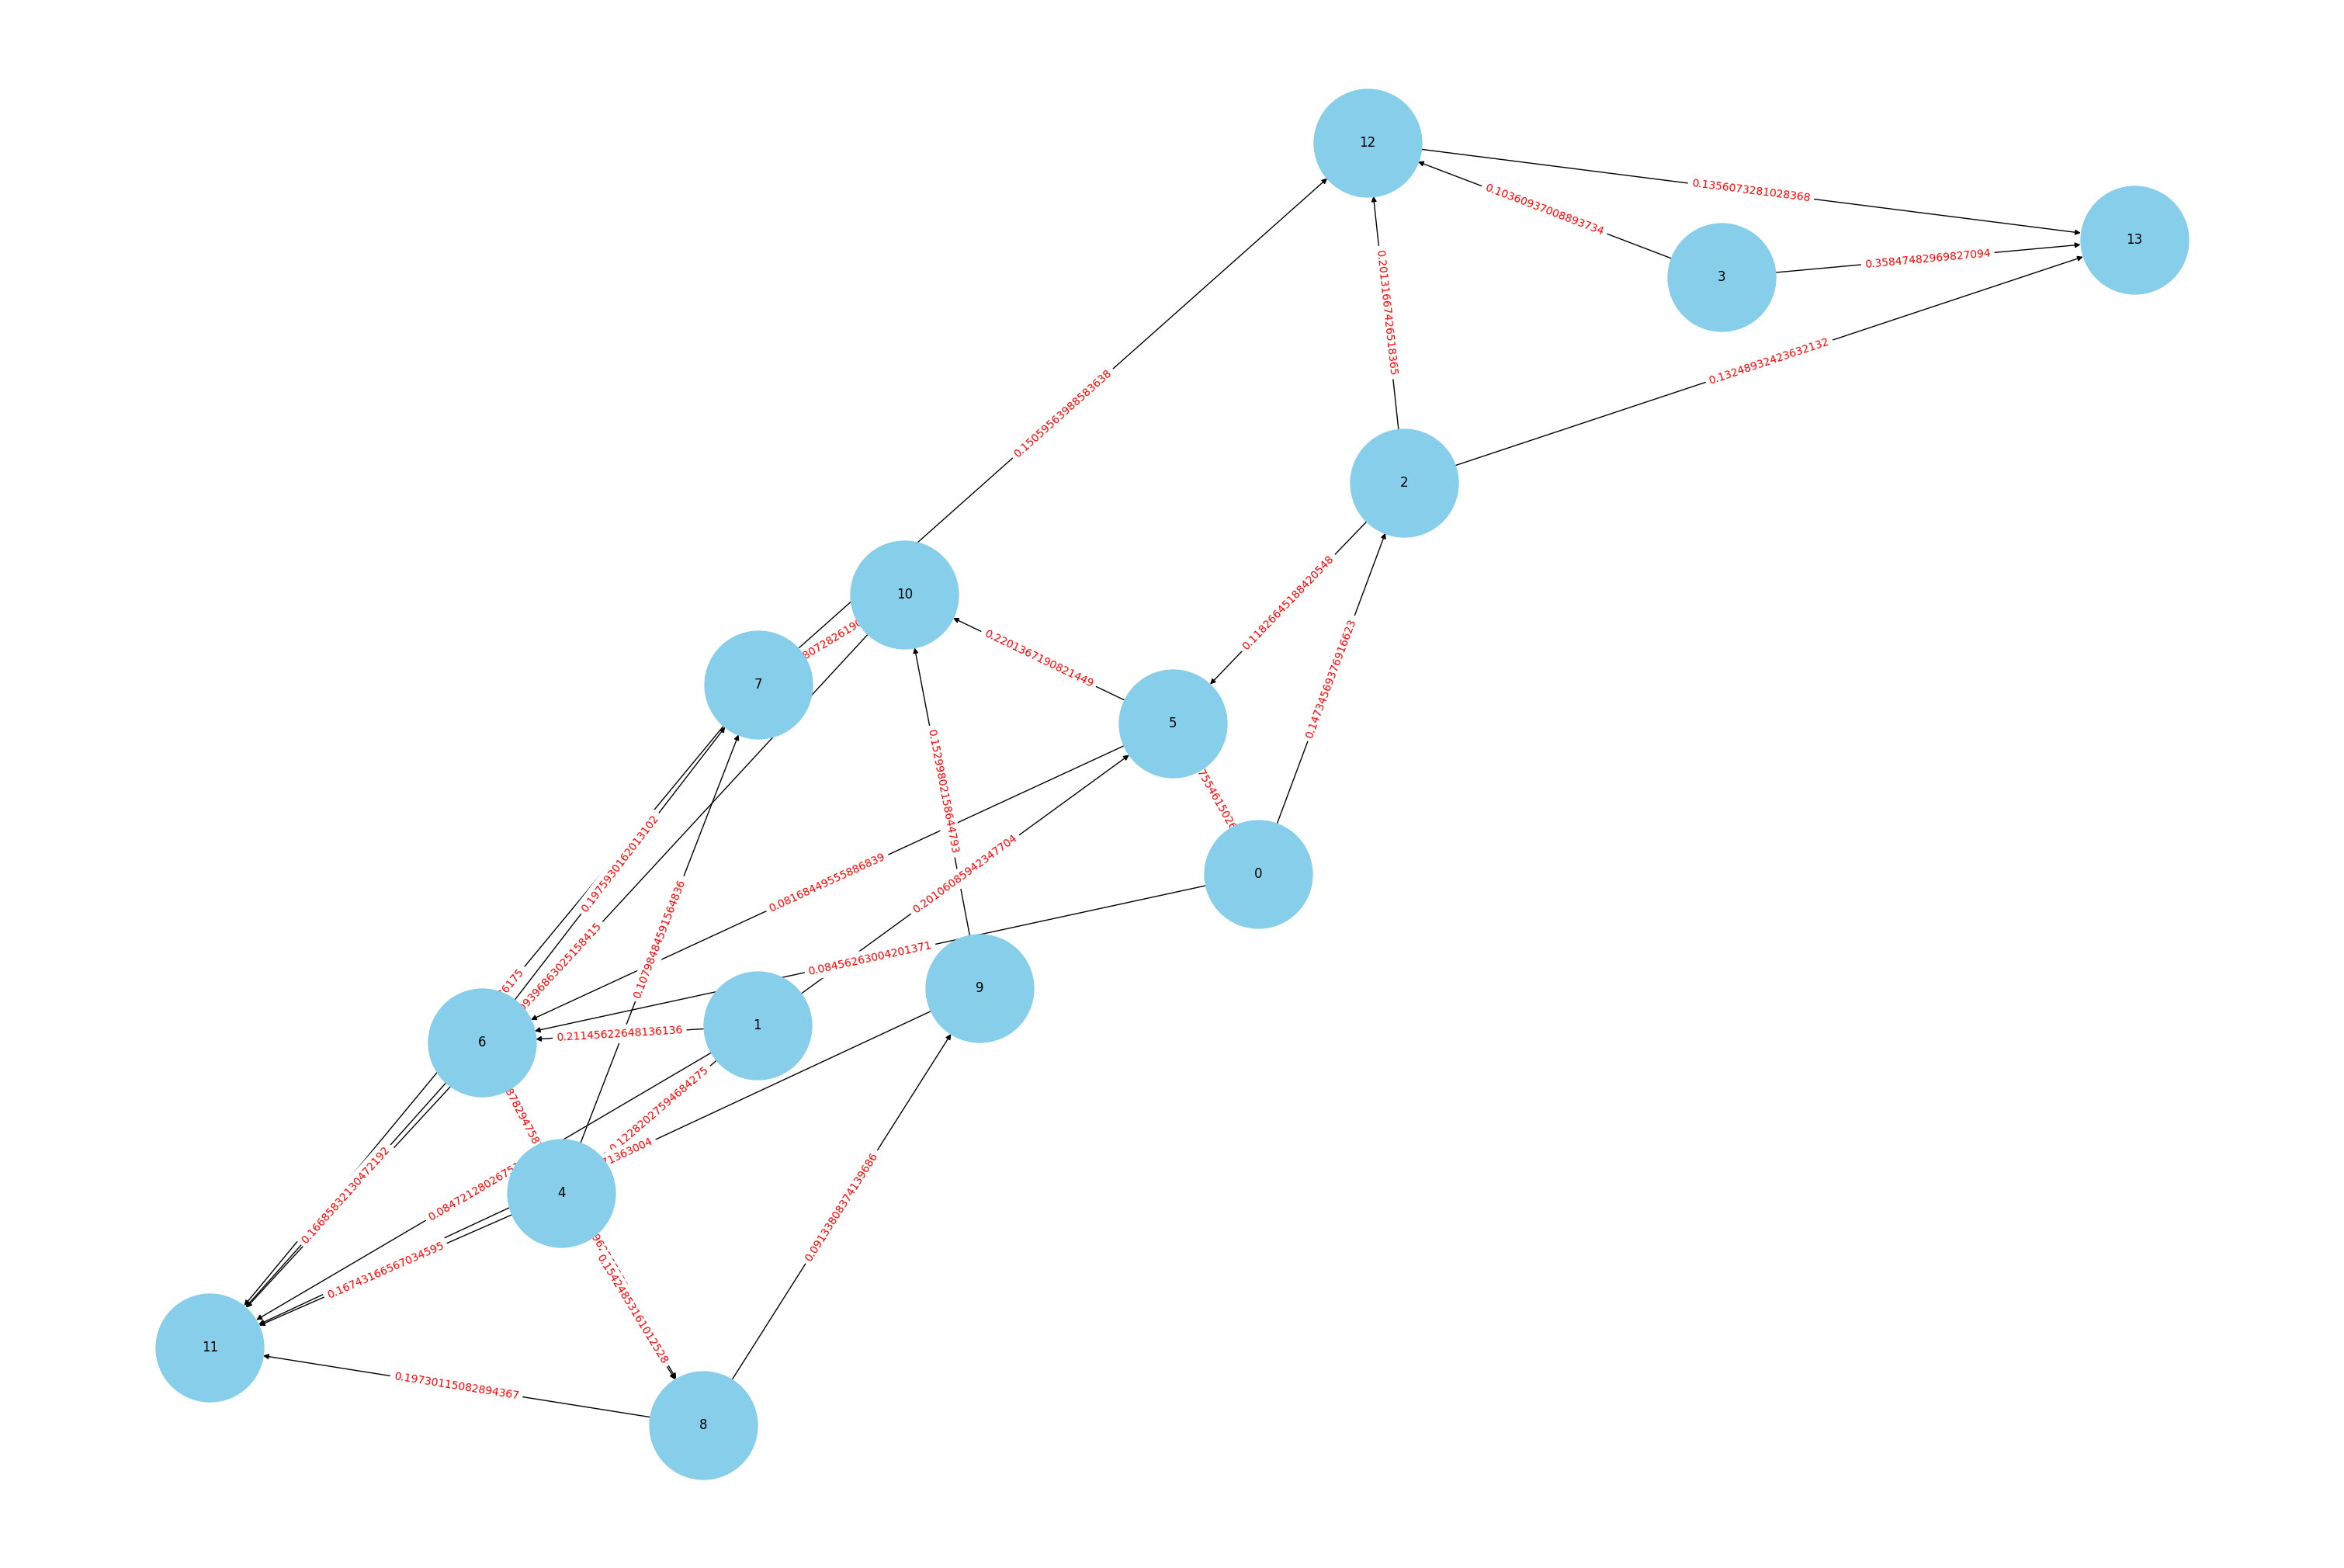



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.058823529411764705
Closenes Centrality Node 3 = 0.058823529411764705
Closenes Centrality Node 4 = 0.17647058823529413
Closenes Centrality Node 5 = 0.17647058823529413
Closenes Centrality Node 8 = 0.2450980392156863
Closenes Centrality Node 9 = 0.3025210084033613
Closenes Centrality Node 10 = 0.3202614379084967
Closenes Centrality Node 11 = 0.41868512110726647
Closenes Centrality Node 6 = 0.0784313725490196
Closenes Centrality Node 7 = 0.0784313725490196
Closenes Centrality Node 12 = 0.28823529411764703
Closenes Centrality Node 13 = 0.4458204334365325
Closenes Centrality Node 14 = 0.4970588235294118
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 15 = 0.0784313725490196
Closenes Centrality Node 17 = 0.0
Closenes Centrality Node 18 = 0.058823529411764705


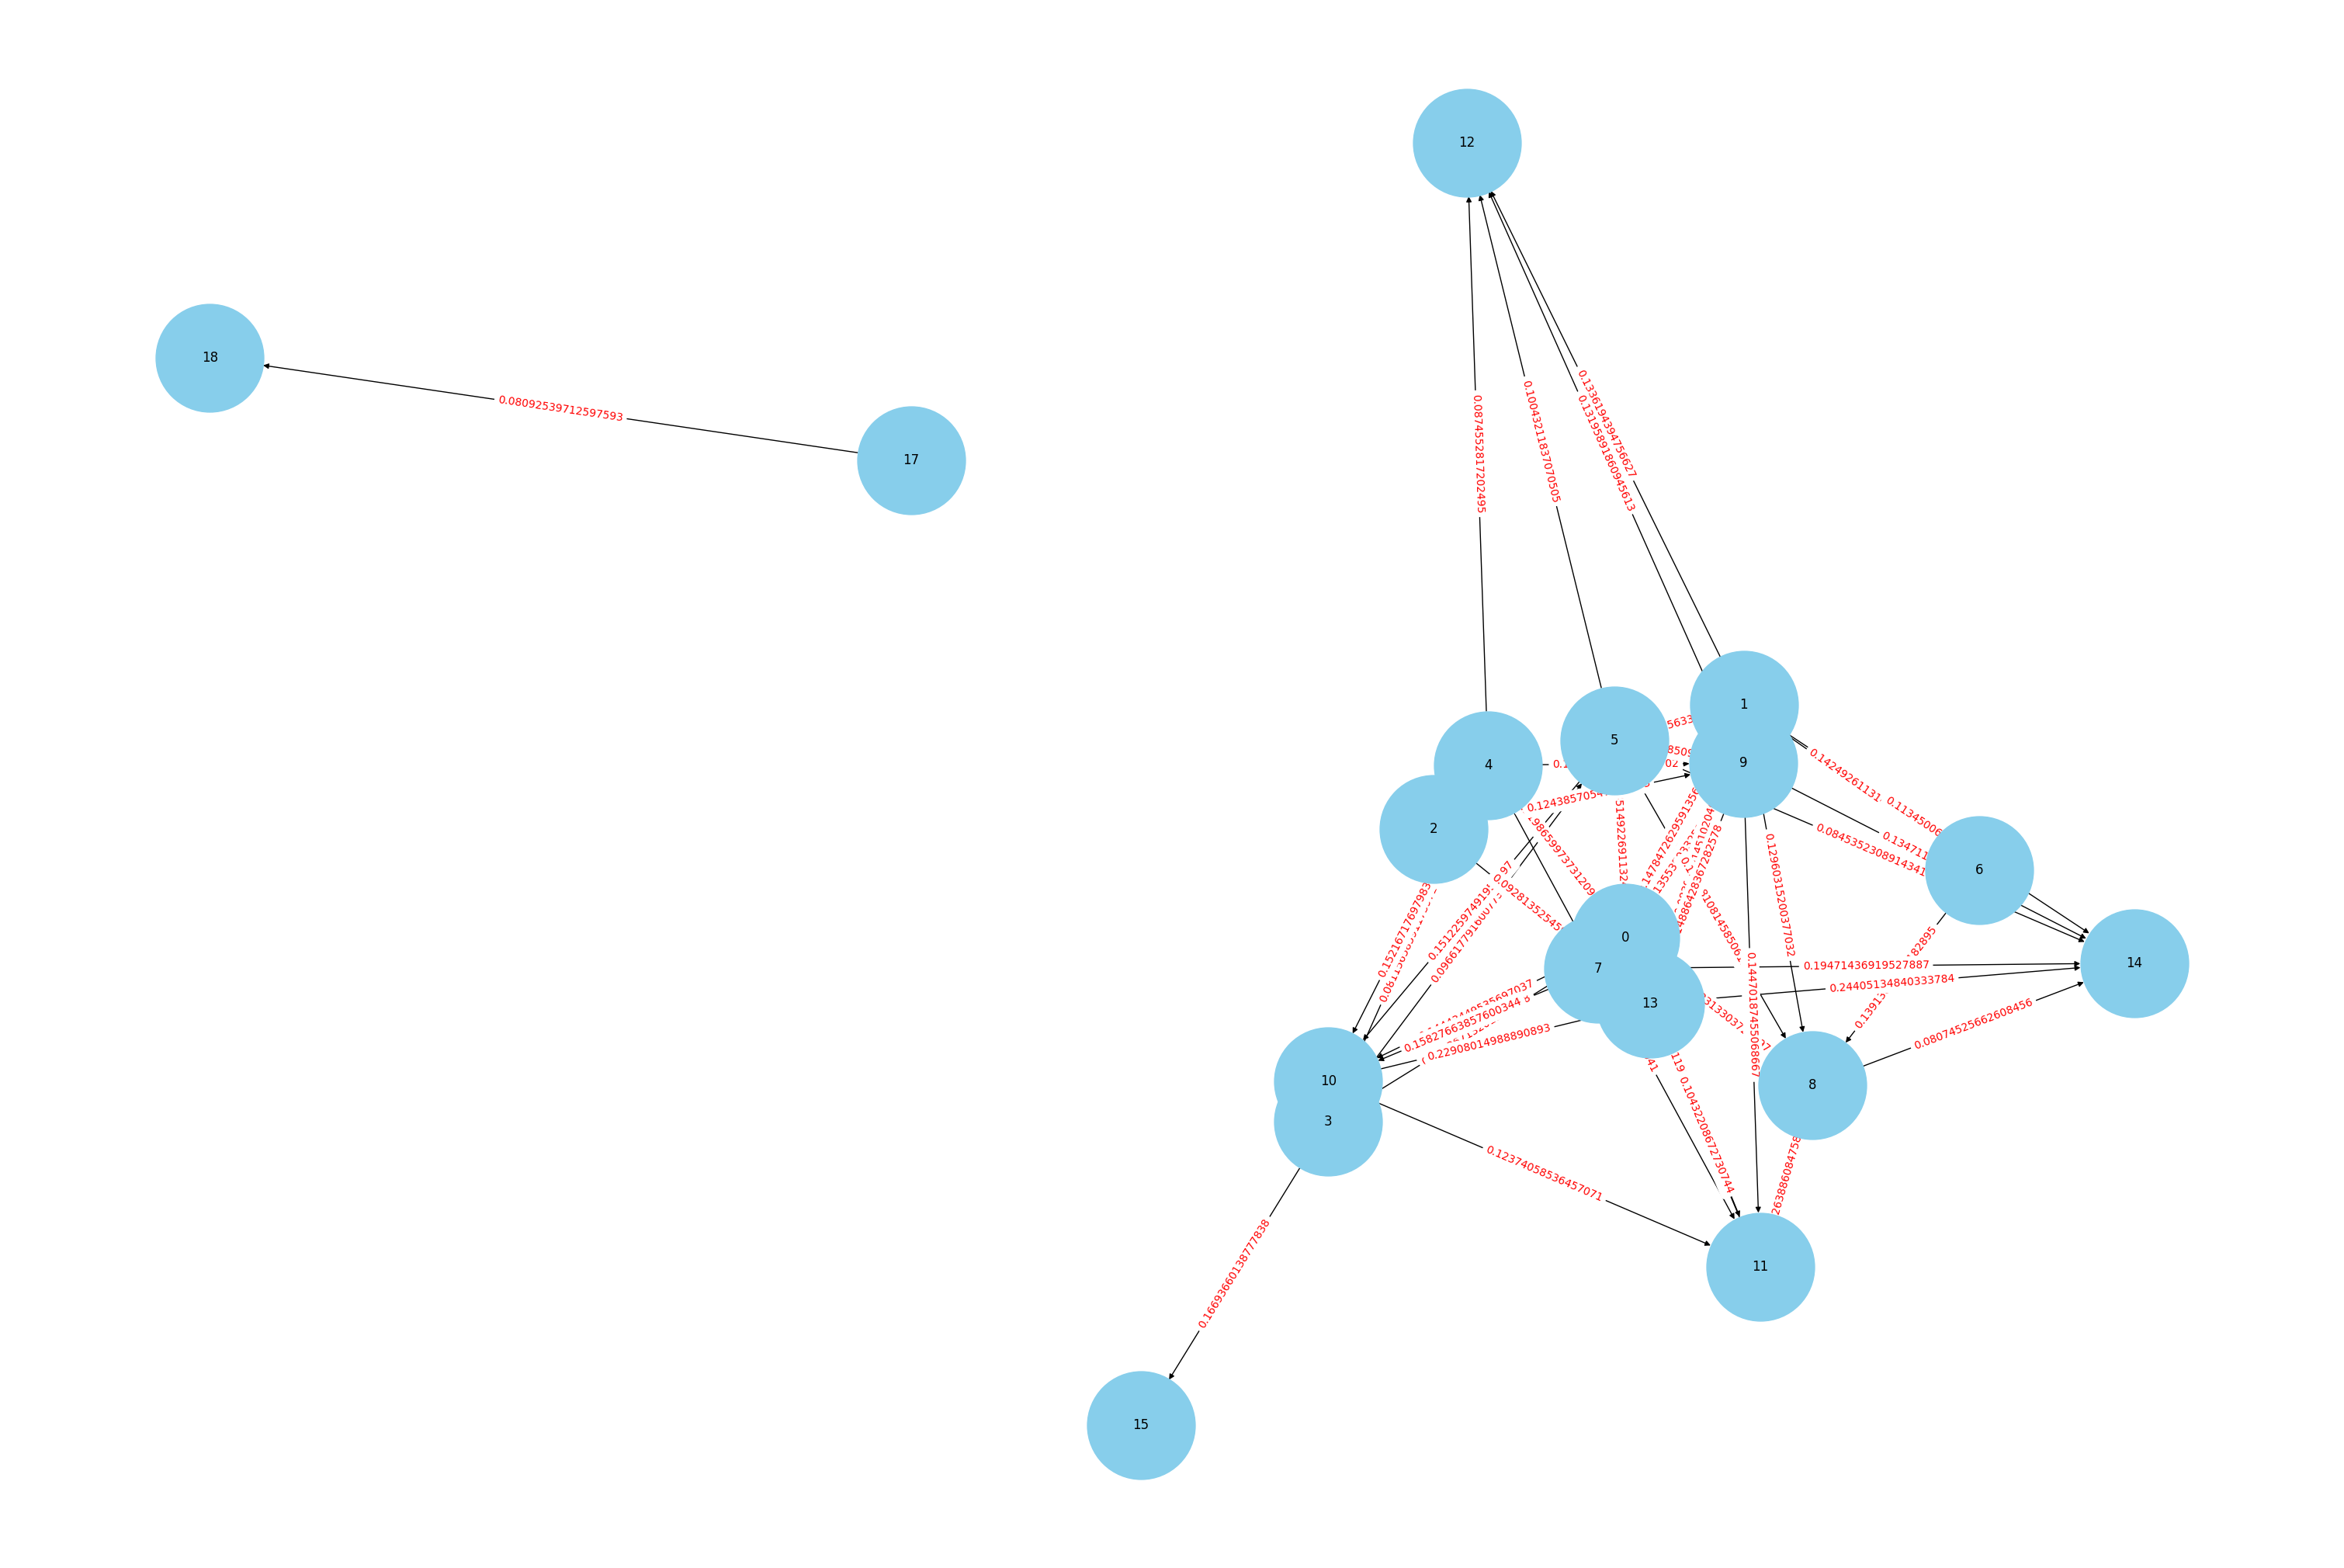



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 7 = 0.4083333333333333
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 2 = 0.08333333333333333
Closenes Centrality Node 3 = 0.16666666666666666
Closenes Centrality Node 4 = 0.25
Closenes Centrality Node 5 = 0.1875
Closenes Centrality Node 8 = 0.5333333333333333
Closenes Centrality Node 9 = 0.44999999999999996
Closenes Centrality Node 10 = 0.3787878787878788
Closenes Centrality Node 6 = 0.2976190476190476
Closenes Centrality Node 12 = 0.5217391304347826
Closenes Centrality Node 11 = 0.5307017543859649


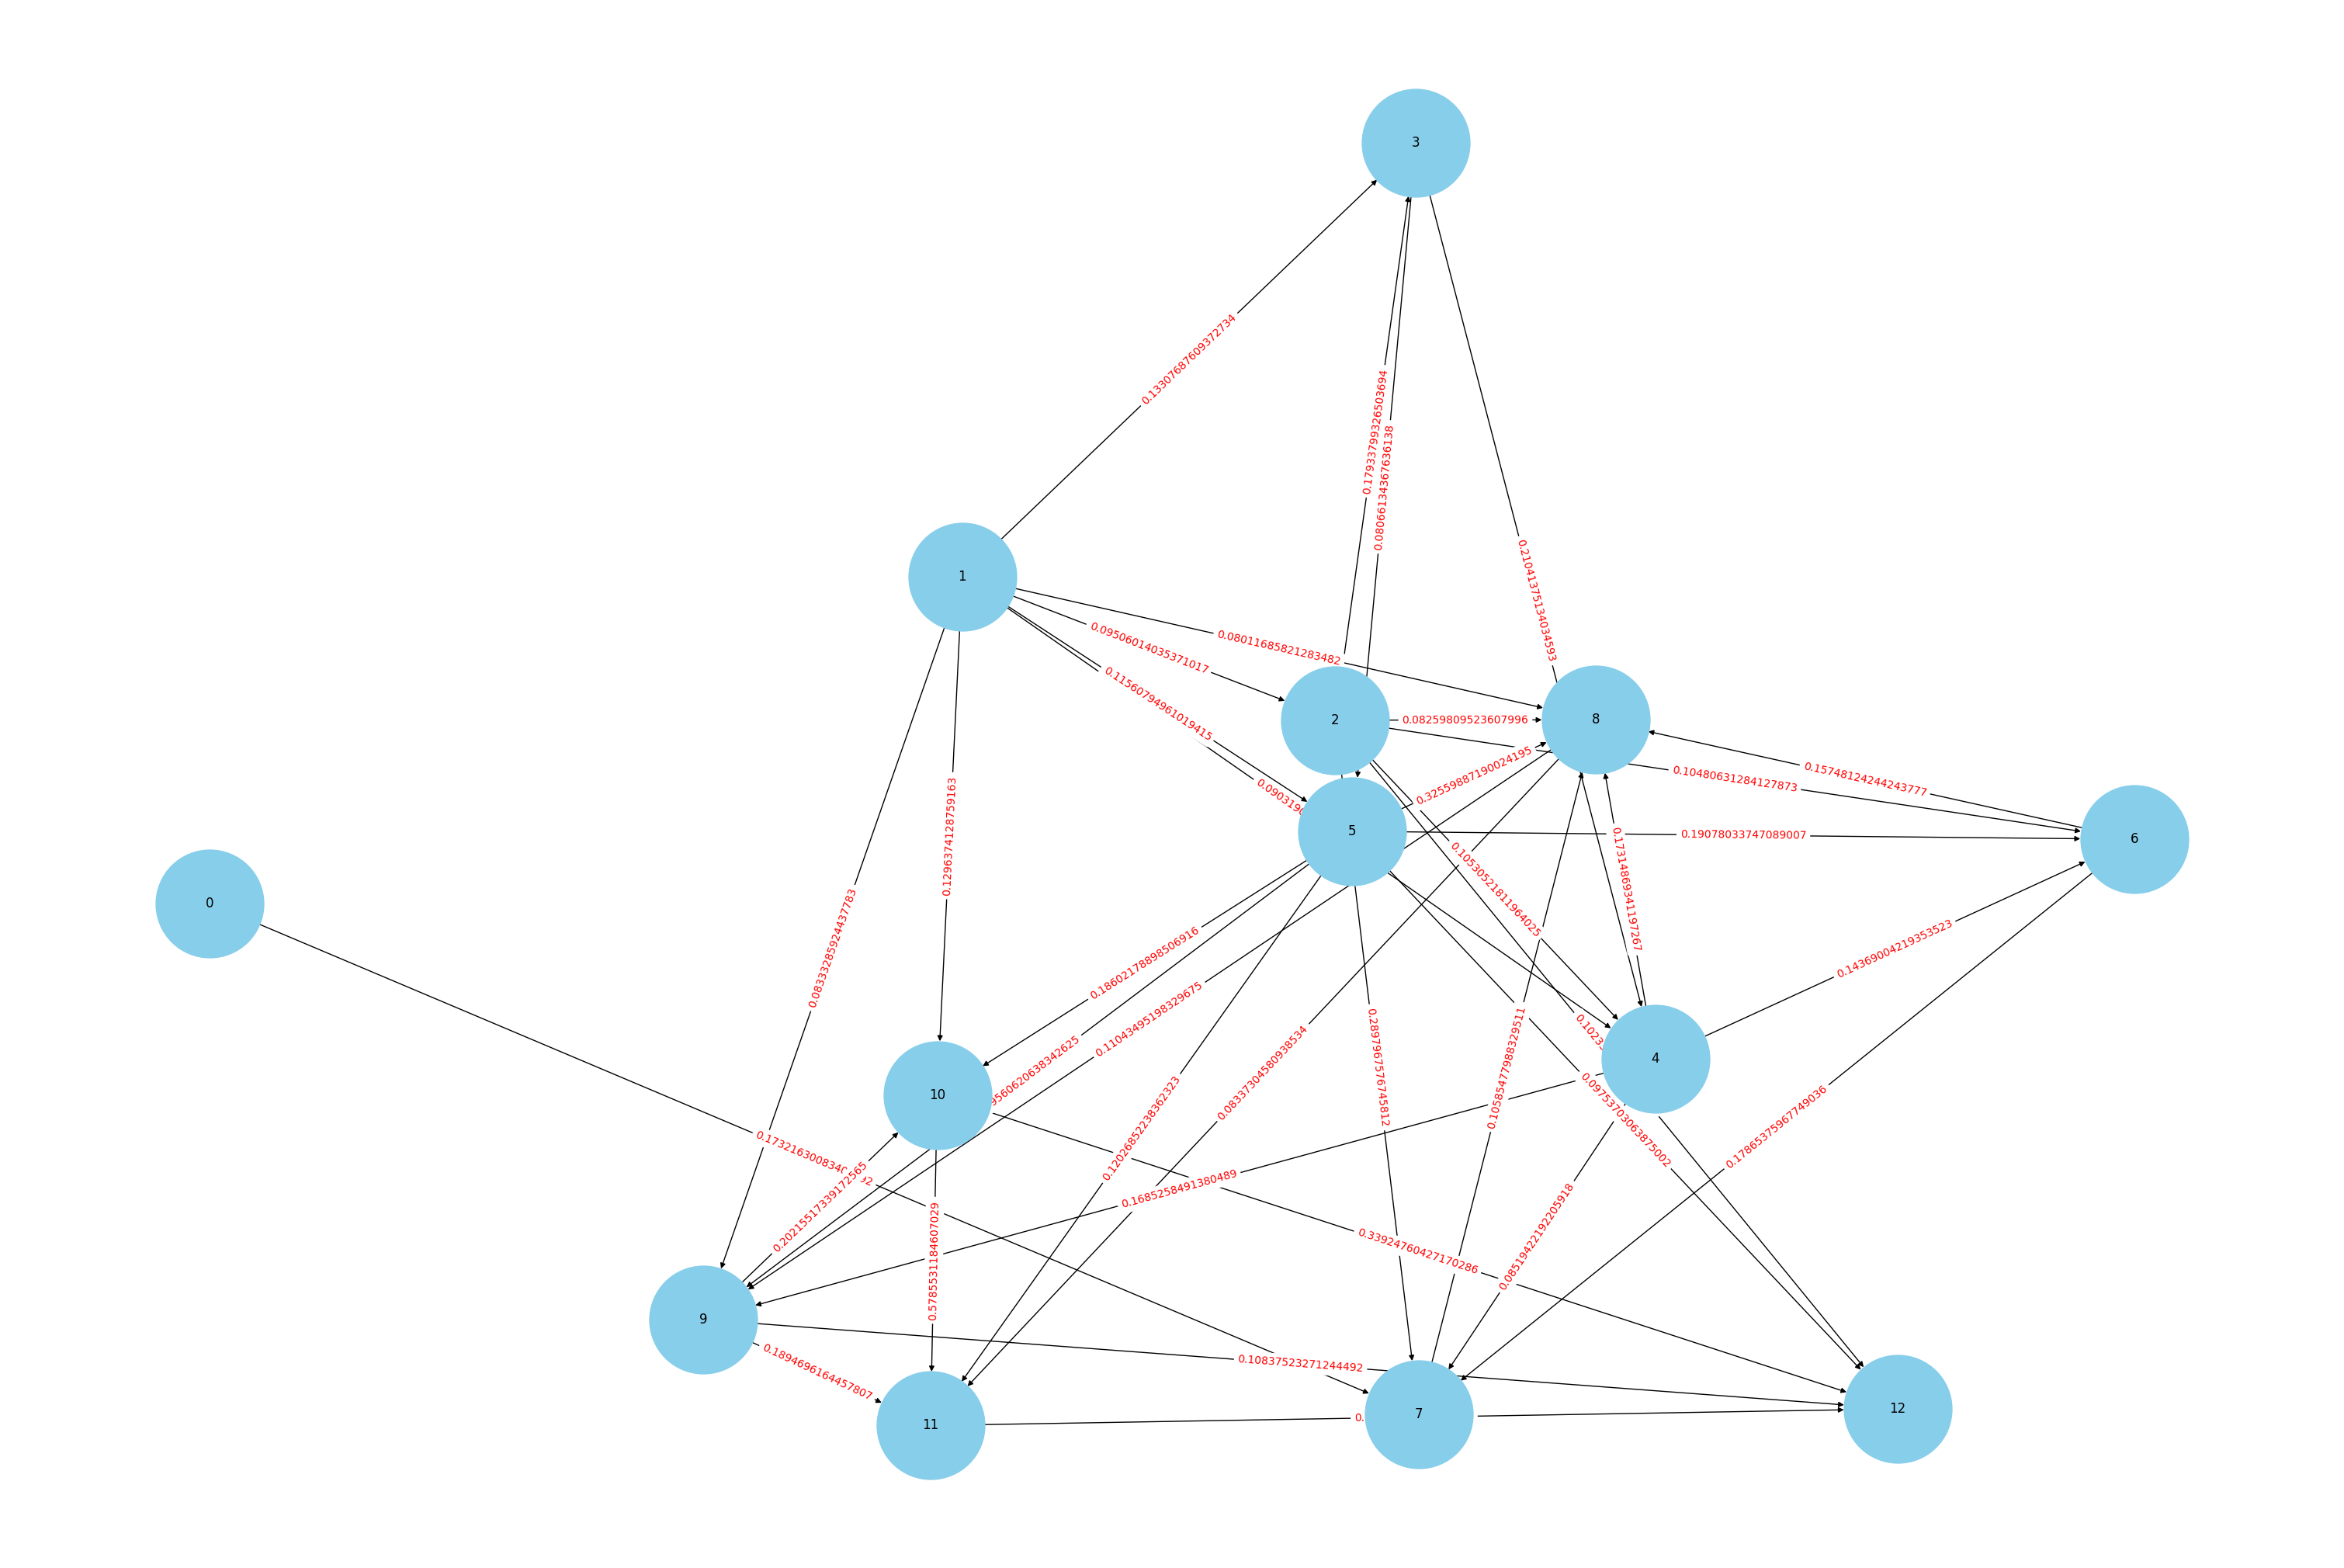



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 9 = 0.07142857142857142
Closenes Centrality Node 12 = 0.5084033613445378
Closenes Centrality Node 13 = 0.4801587301587302
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 2 = 0.07142857142857142
Closenes Centrality Node 4 = 0.21428571428571427
Closenes Centrality Node 5 = 0.19047619047619047
Closenes Centrality Node 6 = 0.2976190476190476
Closenes Centrality Node 8 = 0.2857142857142857
Closenes Centrality Node 11 = 0.4450549450549451
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 10 = 0.19047619047619047
Closenes Centrality Node 14 = 0.6086956521739131
Closenes Centrality Node 7 = 0.16233766233766234


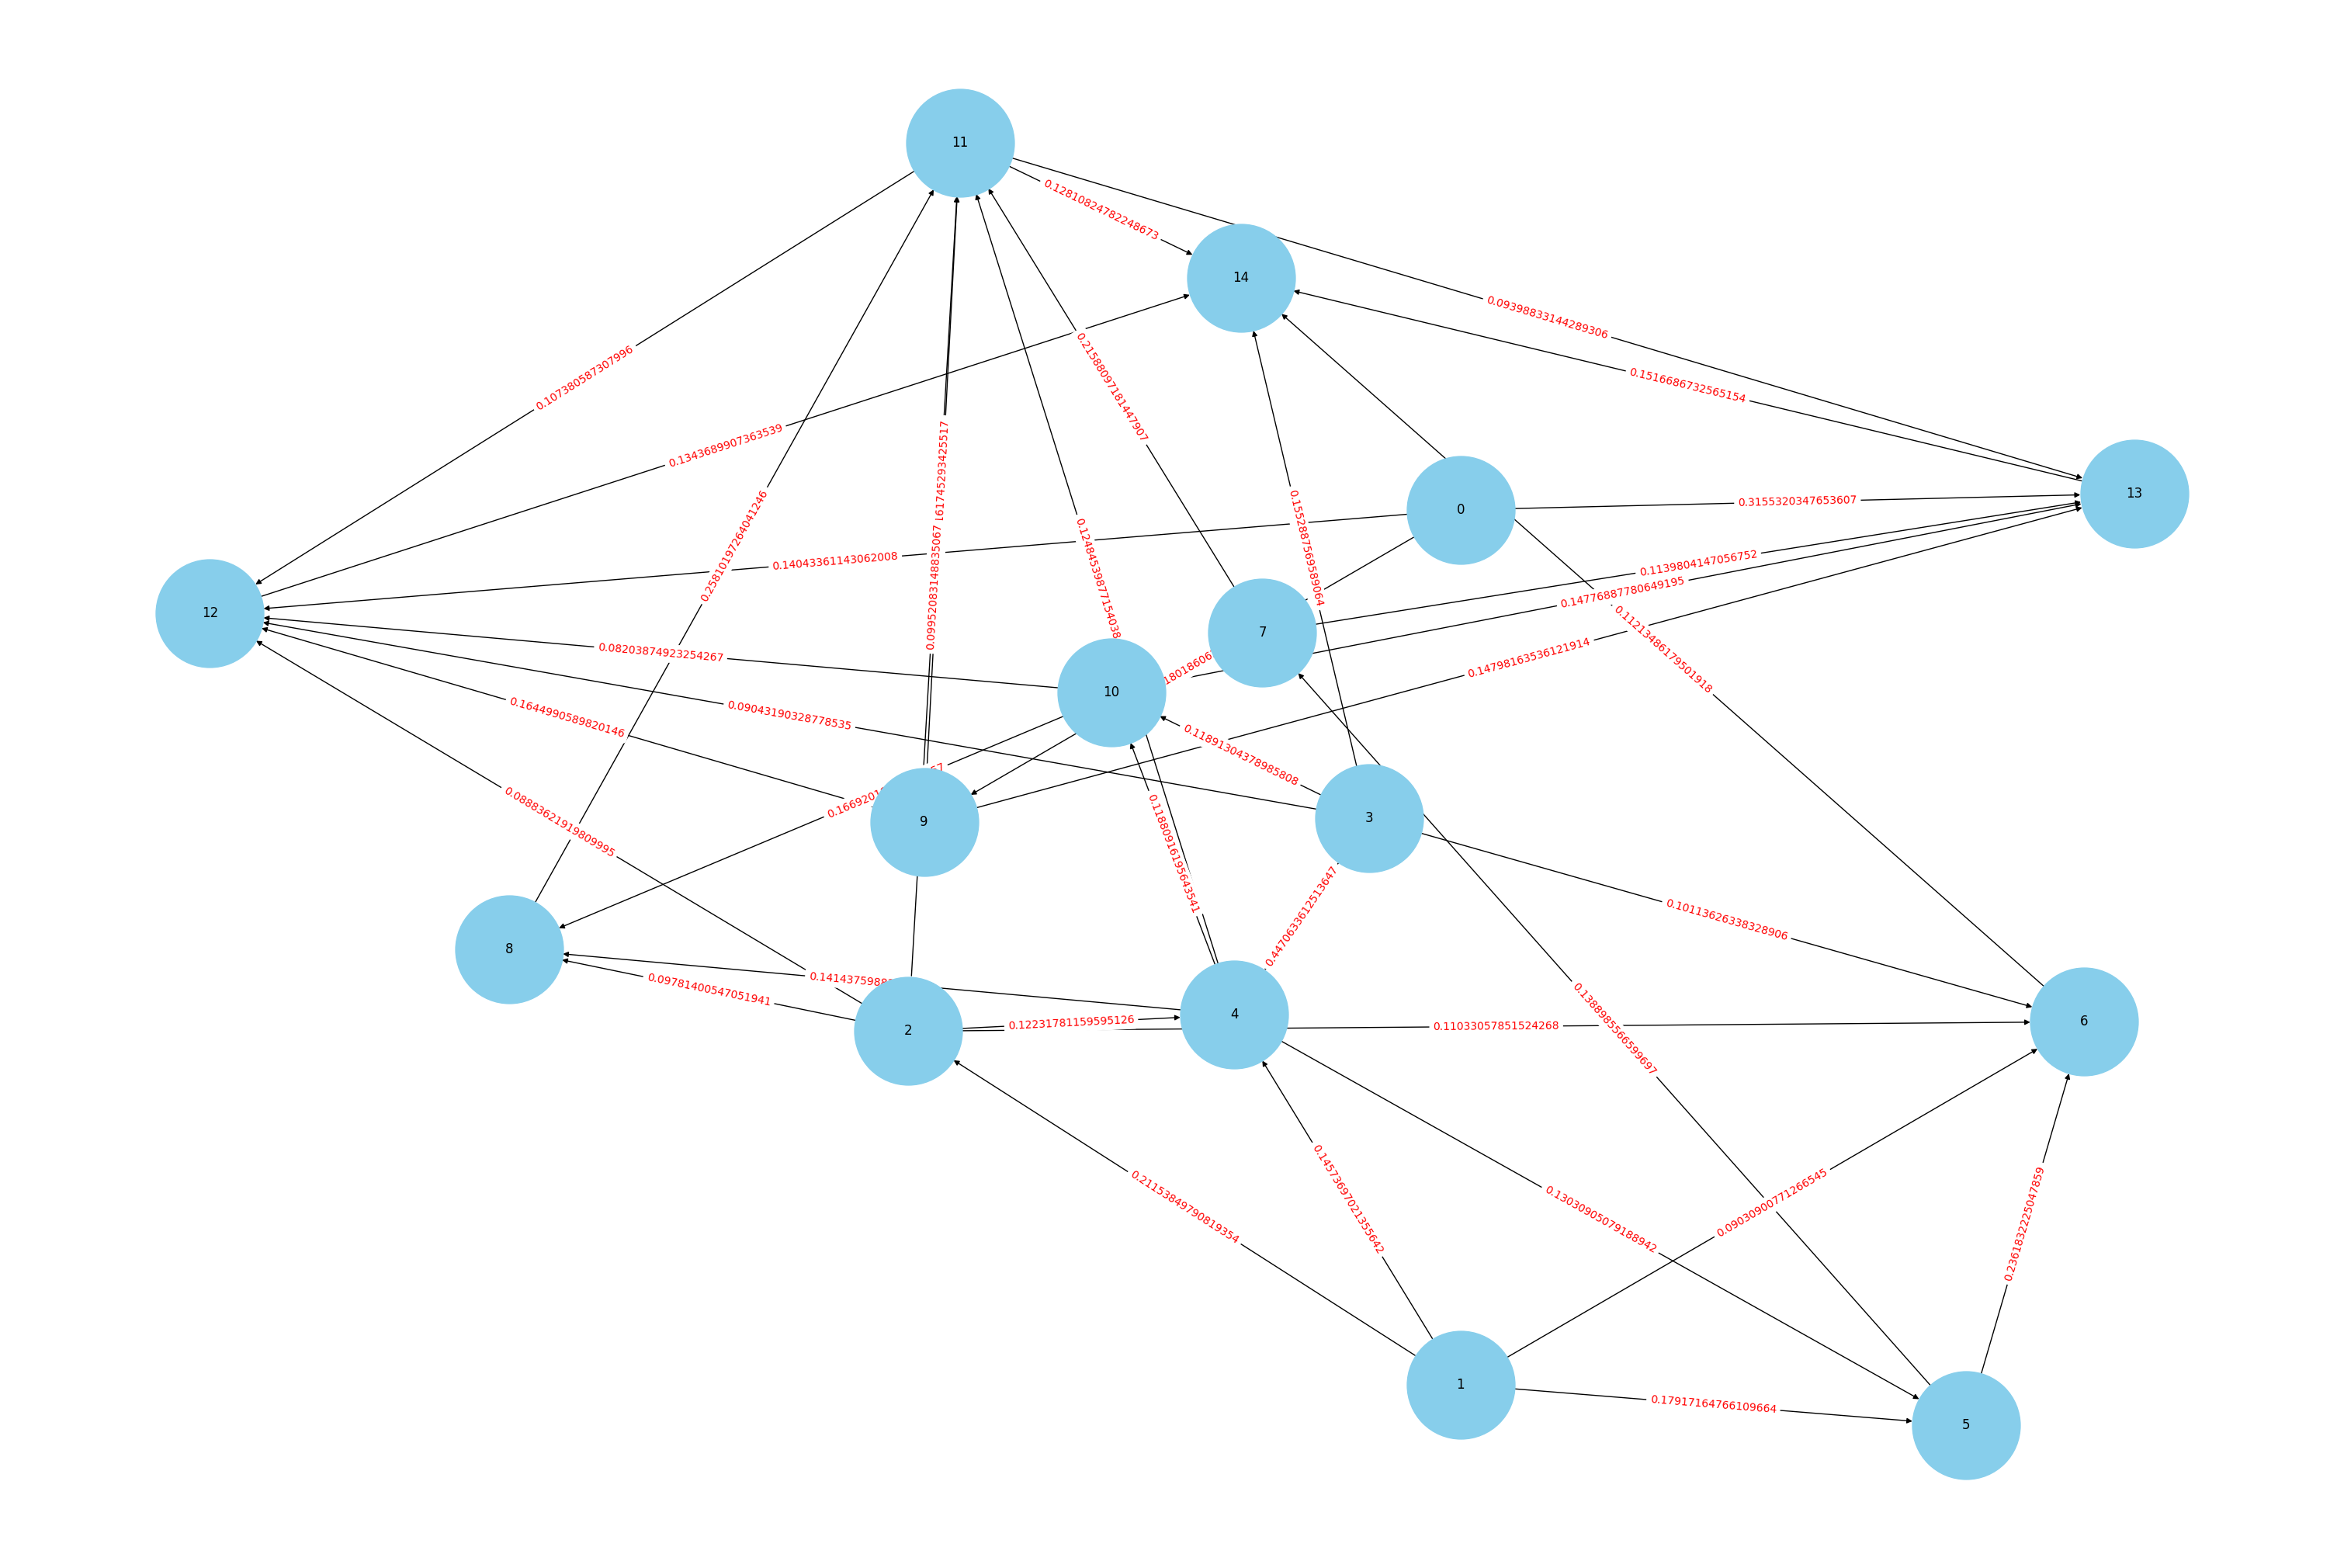

In [ ]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  # ========= menampilkan graf ===========

  pos = nx.spring_layout(graf_result[i])  ## Menentukan posisi/koordinat simpul
  labels = nx.get_edge_attributes(graf_result[i], 'weight') ##mendapatkan atribut berbobot ('weight') dari setiap sisi dalam graf.

  # Menentukan ukuran canvas
  plt.figure(figsize=(30, 20))

  # Menggambar graf dengan ukuran canvas yang diperbesar
  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

***Summary***


> Summary atau ringkasan dalam pemrosesan bahasa alami (Natural Language Processing/NLP) merujuk pada proses merangkum informasi penting atau poin utama dari sebuah teks atau dokumen yang lebih besar menjadi bentuk yang lebih singkat namun mempertahankan esensi atau informasi kunci.



In [ ]:
summary = [] #membuat array kosong untuk hasil summary
for i in range(len(graf_result)): #perulangan setiap graf result

  cc = nx.closeness_centrality(graf_result[i]) #menjadikan closeness centrality pada setiap indeks graf result
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True)) #mengurutkan hasil closness centrality dari yang value terbesar

  lists = list(cc.keys())[:3] #mengambil indeks 3 kalimat teratas
  # print(cc)
  # print(lists)
  current_summary = [] #menyimpan hasil summary sementara

  for key,value in cc.items():
    # print((data['tokenizing'][i][key]))
    current_summary.append(df['Tokenizing'][i][key]) #menambahkan hasil summary setiap kalimat
  summary.append(current_summary) #menambahkan hasil summary setiap dokumen

In [ ]:
# ========== menyimpan summary yang telah diambil ==============

summary_result = [] #membuat list kosong untuk menyimpan hasil summary final
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil) #menambahkan ke dalam final summary

In [ ]:
summary_result

['banyak dari partai politik maupun institusi publik lainnya, termasuk dukungan dari masyarakat bawah yang ikut serta memenangkan prabowo  gibran di pilpres 2024, ucapnya. selain itu, citra keduanya sangat bagus di mata eliteelite politik. sementara itu survei populi juga menemukan adanya potensi prabowo  gibran dapat menang dalam satu putaran dengan perolehan sebesar 42,5 persen. besarnya dukungan terhadap pasangan prabowogibran juga tak lepas dari faktor personalitas dan dukungan politik yang besar, kata solissa. sedangkan ganjar  mahfud hanya mendapat 21,9 persen, begitu juga anies  cak imin dengan 18,4 persen. selain itu, formasi koalisi indonesia maju kim yang dihuni partai politik besar juga menjadi faktor penting dalam bertumbuhnya elektabilitas prabowo  gibran. bahkan, dukungan dari masyarakat garis bawah juga saat ini sudah mulai mengarah kepada sosok prabowo  gibran. dengan modal tersebut, sangat wajar jika hasil survei menunjukan elektabilitas keduanya sangat besar dan kuat.

In [ ]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,df['Category']],axis=1)
dataSummary

,Summary,Category
0,banyak dari partai politik maupun institusi pu...,Nasional
1,dorongan dari seniorsenior politik seperti jok...,Nasional
2,ada harapan baru dari prabowo gibran di bidan...,Nasional
3,pak prabowo cenderung bergerak secara nyata da...,Nasional
4,di sisi lain elektabilitas yang dimiliki pasan...,Nasional
...,...,...
258,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal
259,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal
260,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal
261,pria asli solo itu pun menegaskan bahwa pihakn...,Hukum dan Kriminal


***Save Data Summary***

In [ ]:
datassummary = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = " ".join(ex_summary)
  datassummary.append({
      'Summary':hasil,
      'Category':df['Category'][i]
  })

In [ ]:
# Menyimpan data dalam bentuk CSV
import csv
csv_filename = 'data_summary_radarjatim.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    fieldnames = ['Summary', 'Category']
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")

Data telah disimpan dalam file data_summary_radarjatim.csv


***Modelling Data Summary***

***EDA (Explorasi Data Analysis)***

> Proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut atau membangun model.



In [ ]:
datasummary = pd.read_csv("data_summary_radarjatim.csv")
datasummary

,Summary,Category
0,banyak dari partai politik maupun institusi pu...,Nasional
1,dorongan dari seniorsenior politik seperti jok...,Nasional
2,ada harapan baru dari prabowo gibran di bidan...,Nasional
3,pak prabowo cenderung bergerak secara nyata da...,Nasional
4,di sisi lain elektabilitas yang dimiliki pasan...,Nasional
...,...,...
258,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal
259,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal
260,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal
261,pria asli solo itu pun menegaskan bahwa pihakn...,Hukum dan Kriminal


In [ ]:
datasummary.isna().sum()

Summary     0
Category    0
dtype: int64

In [ ]:
datasummary.duplicated().sum()

0

***Cleaning***

In [ ]:
# recruitments punctuation
import string

# membuat kolom baru dengan nama Summary untuk data baru yang dipunctuation
datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

# Menghilangkan angka dari kolom 'Summary'
datasummary['summary_clean'] = datasummary['summary_clean'].str.replace('\d+', '', regex=True)
datasummary

<ipython-input-33-e9095bfa76de>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  datasummary['summary_clean'] = datasummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


,Summary,Category,summary_clean
0,banyak dari partai politik maupun institusi pu...,Nasional,banyak dari partai politik maupun institusi pu...
1,dorongan dari seniorsenior politik seperti jok...,Nasional,dorongan dari seniorsenior politik seperti jok...
2,ada harapan baru dari prabowo gibran di bidan...,Nasional,ada harapan baru dari prabowo gibran di bidan...
3,pak prabowo cenderung bergerak secara nyata da...,Nasional,pak prabowo cenderung bergerak secara nyata da...
4,di sisi lain elektabilitas yang dimiliki pasan...,Nasional,di sisi lain elektabilitas yang dimiliki pasan...
...,...,...,...
258,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal,saat ini di era keterbukaan tidak ada yang dit...
259,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal,rencananya penataan ulang kompleks rutan surab...
260,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal,mengambil tema indonesia pulih bersatu beranta...
261,pria asli solo itu pun menegaskan bahwa pihakn...,Hukum dan Kriminal,pria asli solo itu pun menegaskan bahwa pihakn...


***StopWords***

> Stopwords digunakan untuk menghilangkan kata umum yang sering muncul dalam teks seperti: di, dan, atau, dari, ke, saya.



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  datasummary['summary_stopwords'] = datasummary['summary_clean'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

datasummary

,Summary,Category,summary_clean,summary_stopwords
0,banyak dari partai politik maupun institusi pu...,Nasional,banyak dari partai politik maupun institusi pu...,banyak dari partai politik maupun institusi pu...
1,dorongan dari seniorsenior politik seperti jok...,Nasional,dorongan dari seniorsenior politik seperti jok...,dorongan dari seniorsenior politik seperti jok...
2,ada harapan baru dari prabowo gibran di bidan...,Nasional,ada harapan baru dari prabowo gibran di bidan...,ada harapan baru dari prabowo gibran di bidan...
3,pak prabowo cenderung bergerak secara nyata da...,Nasional,pak prabowo cenderung bergerak secara nyata da...,pak prabowo cenderung bergerak secara nyata da...
4,di sisi lain elektabilitas yang dimiliki pasan...,Nasional,di sisi lain elektabilitas yang dimiliki pasan...,di sisi lain elektabilitas yang dimiliki pasan...
...,...,...,...,...
258,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal,saat ini di era keterbukaan tidak ada yang dit...,saat ini di era keterbukaan tidak ada yang dit...
259,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal,rencananya penataan ulang kompleks rutan surab...,rencananya penataan ulang kompleks rutan surab...
260,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal,mengambil tema indonesia pulih bersatu beranta...,mengambil tema indonesia pulih bersatu beranta...
261,pria asli solo itu pun menegaskan bahwa pihakn...,Hukum dan Kriminal,pria asli solo itu pun menegaskan bahwa pihakn...,pria asli solo itu pun menegaskan bahwa pihakn...


***Tokenizing***

> Tokenizing adalah proses memecah teks atau dokumen menjadi potongan-potongan yang lebih kecil, yang disebut token.



In [ ]:
datasummary['summary_tokens'] = datasummary['summary_stopwords'].apply(word_tokenize)
datasummary

,Summary,Category,summary_clean,summary_stopwords,summary_tokens
0,banyak dari partai politik maupun institusi pu...,Nasional,banyak dari partai politik maupun institusi pu...,banyak dari partai politik maupun institusi pu...,"[banyak, dari, partai, politik, maupun, instit..."
1,dorongan dari seniorsenior politik seperti jok...,Nasional,dorongan dari seniorsenior politik seperti jok...,dorongan dari seniorsenior politik seperti jok...,"[dorongan, dari, seniorsenior, politik, sepert..."
2,ada harapan baru dari prabowo gibran di bidan...,Nasional,ada harapan baru dari prabowo gibran di bidan...,ada harapan baru dari prabowo gibran di bidan...,"[ada, harapan, baru, dari, prabowo, gibran, di..."
3,pak prabowo cenderung bergerak secara nyata da...,Nasional,pak prabowo cenderung bergerak secara nyata da...,pak prabowo cenderung bergerak secara nyata da...,"[pak, prabowo, cenderung, bergerak, secara, ny..."
4,di sisi lain elektabilitas yang dimiliki pasan...,Nasional,di sisi lain elektabilitas yang dimiliki pasan...,di sisi lain elektabilitas yang dimiliki pasan...,"[di, sisi, lain, elektabilitas, yang, dimiliki..."
...,...,...,...,...,...
258,saat ini di era keterbukaan tidak ada yang dit...,Hukum dan Kriminal,saat ini di era keterbukaan tidak ada yang dit...,saat ini di era keterbukaan tidak ada yang dit...,"[saat, ini, di, era, keterbukaan, tidak, ada, ..."
259,rencananya penataan ulang kompleks rutan surab...,Hukum dan Kriminal,rencananya penataan ulang kompleks rutan surab...,rencananya penataan ulang kompleks rutan surab...,"[rencananya, penataan, ulang, kompleks, rutan,..."
260,mengambil tema indonesia pulih bersatu beranta...,Hukum dan Kriminal,mengambil tema indonesia pulih bersatu beranta...,mengambil tema indonesia pulih bersatu beranta...,"[mengambil, tema, indonesia, pulih, bersatu, b..."
261,pria asli solo itu pun menegaskan bahwa pihakn...,Hukum dan Kriminal,pria asli solo itu pun menegaskan bahwa pihakn...,pria asli solo itu pun menegaskan bahwa pihakn...,"[pria, asli, solo, itu, pun, menegaskan, bahwa..."


In [ ]:
# merubah posisi kolom
datasummary = datasummary[['Summary', 'summary_clean', 'summary_stopwords',
            'summary_tokens','Category']]

***Merge***

> Merupakan proses penggabungan kata yang telah dinormalisasi dijadikan menjadi satu kalimat utuh



In [ ]:
# menggabungkan kata
datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-38-9538fca829d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasummary['summary_final'] = datasummary['summary_tokens'].apply(lambda x: ' '.join(x))


***TF-IDF***

> metode yang digunakan dalam pemrosesan bahasa alami (Natural Language Processing - NLP) dan pengambilan informasi (Information Retrieval) untuk mengukur seberapa penting suatu kata dalam suatu dokumen atau kumpulan dokumen. Tujuannya adalah untuk memberikan bobot yang lebih tinggi kepada kata-kata yang penting dalam representasi teks.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan transformasi TF-IDF pada kolom 'final_abstrak'
tfidf_matrix = tfidf_vectorizer.fit_transform(datasummary['summary_final'])

# Membuat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
tfidf_df = pd.concat([datasummary['Summary'],tfidf_df,datasummary['Category']],axis=1)
# Cetak DataFrame TF-IDF
tfidf_df

,Summary,0,1,2,3,4,5,6,7,8,...,9813,9814,9815,9816,9817,9818,9819,9820,9821,Category
0,banyak dari partai politik maupun institusi pu...,0.0,0.0,0.0,0.063952,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nasional
1,dorongan dari seniorsenior politik seperti jok...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nasional
2,ada harapan baru dari prabowo gibran di bidan...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nasional
3,pak prabowo cenderung bergerak secara nyata da...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nasional
4,di sisi lain elektabilitas yang dimiliki pasan...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nasional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,saat ini di era keterbukaan tidak ada yang dit...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
259,rencananya penataan ulang kompleks rutan surab...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
260,mengambil tema indonesia pulih bersatu beranta...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal
261,pria asli solo itu pun menegaskan bahwa pihakn...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hukum dan Kriminal


***Modelling***

In [ ]:
# import library
from sklearn.model_selection import train_test_split

# Bagi data menjadi pelatihan (80%) dan pengujian (20%)
X_tfidf = tfidf_df.iloc[:,1:-1]
# X_tfidf
y_tfidf = tfidf_df["Category"]
# y_tfidf
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

***Naive Bayes***

In [ ]:
# Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_tfidf_train, y_tfidf_train)

y_pred = naive_bayes.predict(X_tfidf_test)

accuracy_naiveBayes = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.8679245283018868


***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = knn.predict(X_tfidf_test)

accuracy_knn = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.8867924528301887


***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.8490566037735849


***Visualisasi***

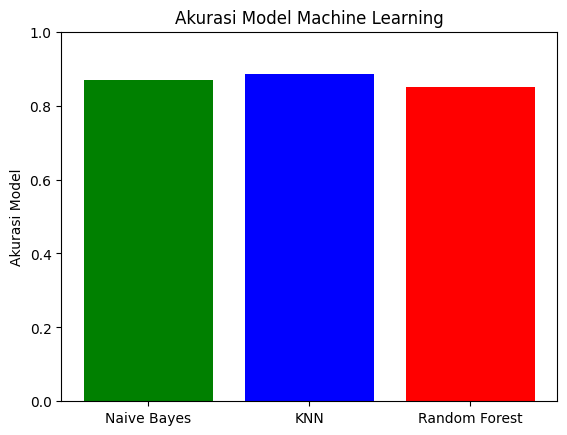

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'KNN', 'Random Forest']
accuracies = [accuracy_naiveBayes, accuracy_knn, accuracy_rf]

plt.bar(models, accuracies, color=[ 'green', 'blue', 'red'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()